<a href="https://colab.research.google.com/github/Yuvraj2409/BE-PROJECT/blob/master/ANPR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cp /content/drive/My\ Drive/car2.jpg ./

In [0]:
import cv2

In [0]:
ls

car2.jpg  drive/  img.jpg  sample_data/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('car2.jpg',1)
img = cv2.imread('img.jpg',0)

In [0]:
gray = cv2.resize(img, (620,480) )
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale

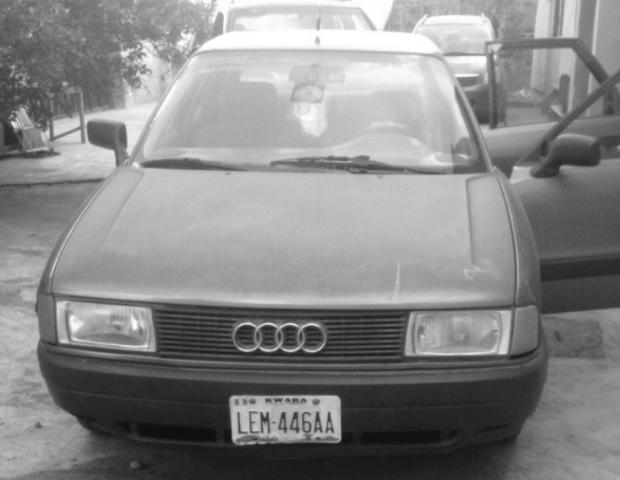

In [0]:
from google.colab.patches import cv2_imshow

cv2_imshow(gray)

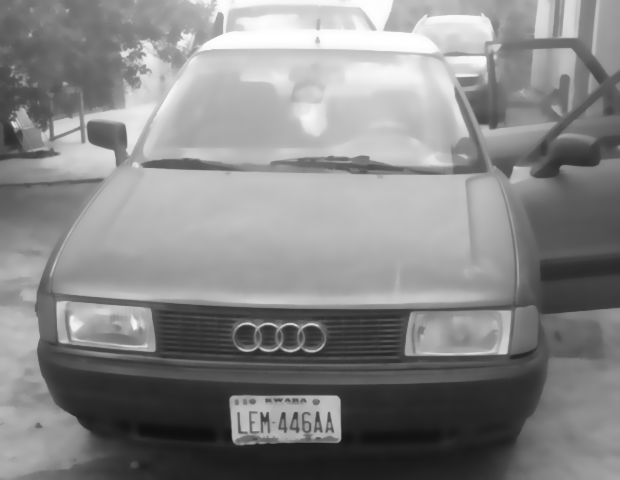

In [0]:
gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2_imshow(gray)

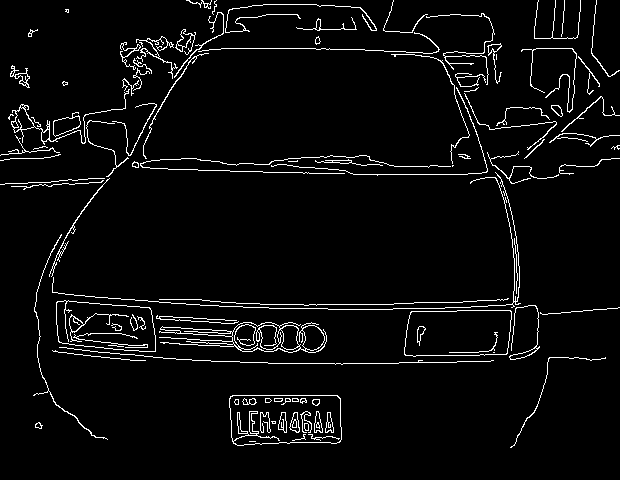

In [0]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
cv2_imshow(edged)

In [0]:
pip install imutils

In [0]:
import imutils
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [0]:
img1 = cv2.imread('img.jpg',1)
img1 = cv2.resize(img1, (620,480) )

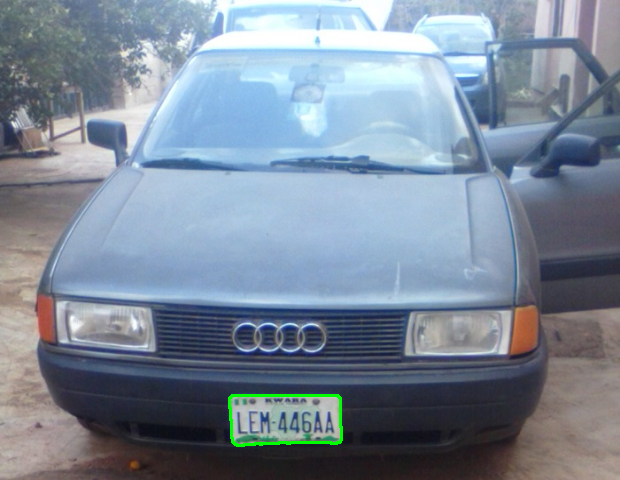

In [0]:
 cv2.drawContours( img1, cnts, 0, (0,255,0), 2, 8 )
 cv2_imshow(img1)

In [0]:
for c in cnts:
                # approximate the contour
                peri = cv2.arcLength(c, True)
                approx = cv2.approxPolyDP(c, 0.03 * peri, True)
                # if our approximated contour has four points, then
                # we can assume that we have found our screen
                if len(approx) == 4:
                      screenCnt = approx
                      break

(480, 620, 3)


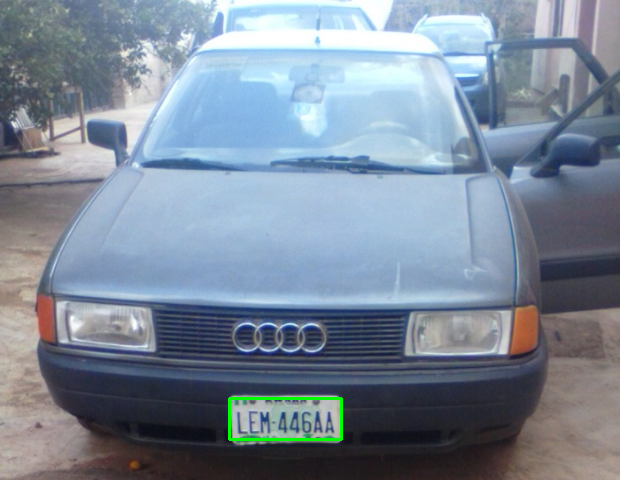

[[[229 398]]

 [[237 445]]

 [[341 439]]

 [[337 395]]]


In [0]:
print(img1.shape)
cv2.rectangle(img1,(screenCnt[0][0][0], screenCnt[0][0][1]),(screenCnt[2][0][0],screenCnt[2][0][1]),(0,255,0),2)
cv2_imshow(img1)

print(screenCnt)

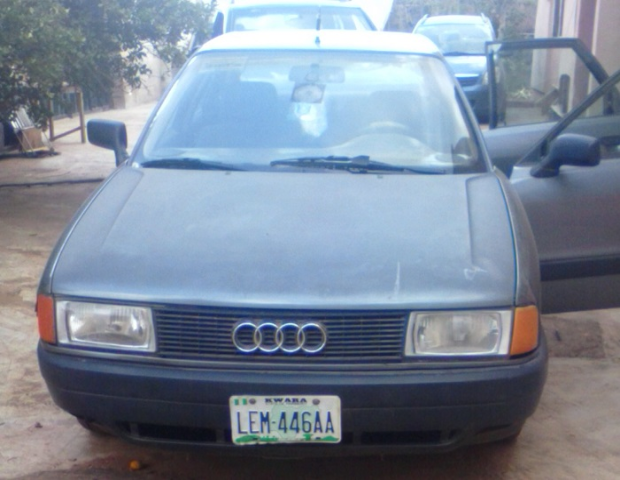

In [0]:
img2 = cv2.imread('img.jpg',1)
img2 = cv2.resize(img2, (620,480) )
cv2_imshow(img2)

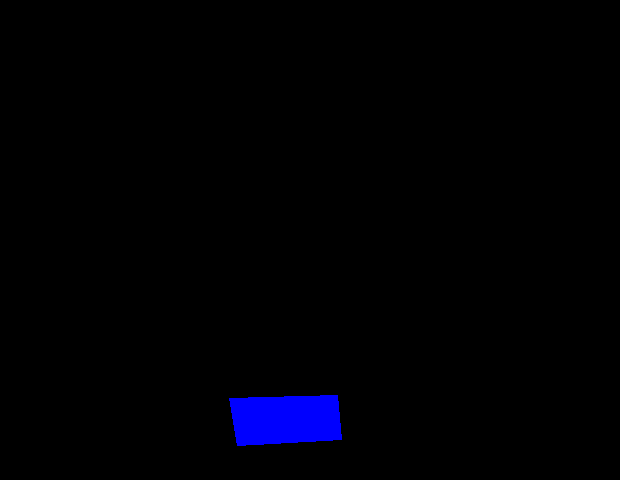

In [0]:
mask = np.zeros(img2.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
cv2_imshow(mask)

In [0]:
new_image = cv2.bitwise_and(img2,img2,mask=mask)

error: ignored